# Programming Assignment # 4 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell! 

Student Full Name:Harshini Kandimalla

ID:1001960046

Team Mate name :Pratik Antoni Patekar

ID:1001937948

Team Mate name : Pratik Dhanraj Chavan

ID:1001963580

## Rules

1. Work is to be done in a team
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa3.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is required for this assignment. Still you need to comment your code. (-10 for no comments in the code.)
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.



## Assignment Details

The purpose of this assignment is to cluster  using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is given as 2 files(clustering.csv and college.csv).<br>
Output variable for clustering.csv - Class (<=50K and >50K)<br>
Output variable for college.csv - Grad.Rate (<=50 and >50k)<br>

You need to submit this ipython file after renaming it. 

Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.



In [71]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 




In [72]:
#importing the required packages
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [73]:
# loading the data 
df=pd.read_csv("College.csv")


In [74]:
#getting information of dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [75]:
#it shows first five rows of dataset by default
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [76]:
#  renamed the unnamed column
df.rename( columns={'Unnamed: 0' :'university'}, inplace=True )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   university   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [77]:
# checking if there are any missing and nullvalues
Null_Values = df.isnull().sum()
print(Null_Values)

university     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64


In [78]:
#renaming columns which are notvalid
df.rename(columns = {'F.Undergrad':'F_Undergrad'}, inplace = True)
df.rename(columns = {'P.Undergrad':'P_Undergrad'}, inplace = True)
df.rename(columns = {'Room.Board':'Room_Board'}, inplace = True)
df.rename(columns = {'Grad.Rate':'Grad_Rate'}, inplace = True)
#normalizing the data and fitting dataset
la_en = LabelEncoder()
university = la_en.fit_transform(df.university)
df["university"]=university
Private = la_en.fit_transform(df.Private)
df["Private"]=Private
Apps = la_en.fit_transform(df.Apps)
df["Apps"]=Apps
Accept = la_en.fit_transform(df.Accept)
df["Accept"]=Accept
F_Undergrad = la_en.fit_transform(df.F_Undergrad)
df["F_Undergrad"]=F_Undergrad
P_Undergrad = la_en.fit_transform(df.P_Undergrad)
df["P_Undergrad"]=P_Undergrad
Outstate = la_en.fit_transform(df.Outstate)
df["Outstate"]=Outstate
Room_Board = la_en.fit_transform(df.Room_Board)
df["Room_Board"]=Room_Board
Personal = la_en.fit_transform(df.Personal)
df["Personal"]=Personal
Expend = la_en.fit_transform(df.Expend)
df["Expend"]=Expend
Grad_Rate = la_en.fit_transform(df.Grad_Rate)
df["Grad_Rate"]=Grad_Rate
df.head()

,university,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad_Rate
0,0,1,352,337,721,23,52,460,275,169,98,450,232,70,78,18.1,12,219,39
1,1,1,414,452,512,16,29,441,405,440,520,750,137,29,30,12.2,16,541,35
2,2,1,314,318,336,22,50,178,84,388,188,400,90,53,66,12.9,30,401,33
3,3,1,57,61,137,60,89,31,57,466,442,450,48,92,97,7.7,37,713,38
4,4,1,8,6,55,16,44,3,358,175,251,800,137,76,72,11.9,2,560,1


# Import required Python packages here
# Seaborn,numpy,pandas,sklearn,matplotlib only
-20 points for the use of libraries other than the above mentioned

## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

In [79]:
import sklearn.cluster as cluster

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


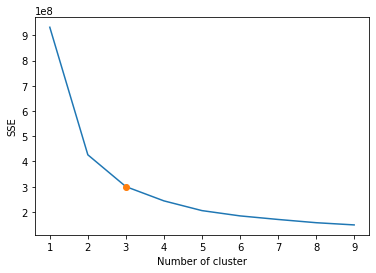

Optimal value for k is 3


In [80]:
#########################begin code for Task 1-a
#########################begin code for Task 1-a

K=range(1,10)
SSE_dict = {}
#we calculate kmeans clustering for dataset from k=1to10,store the data and plot graph
for k in K:
    kmeans = cluster.KMeans(n_clusters=k,init="k-means++").fit(df)
    SSE_dict[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(SSE_dict.keys()), list(SSE_dict.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.plot(3,SSE_dict[3],marker='o')
plt.show()
print("Optimal value for k is 3")




### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [81]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing
# random state = 2022
### Important!!!
#Return 70% of items from the dataset
x_train7 = df.sample(frac=0.70, random_state= 2022)
#it stores the remaining percent from the dataset.
x_test3 = df.drop(x_train7.index) 
y_train7 = x_train7.pop('Private')
y_test3 = x_test3.pop('Private')


###################end code for Task 1-b-1

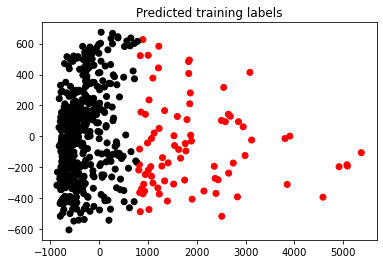

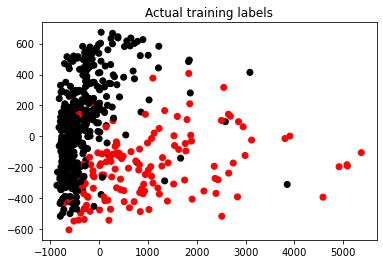

In [82]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels

# Import PCA
from sklearn.decomposition import PCA

colors = ['red', 'black']
# Create the KMeans model
KM = KMeans(n_clusters=2, random_state=2022).fit(x_train7) 
# Compute cluster centers and predict cluster index for each sample 
c_index=KM.predict(x_train7)

# Model and fit the data to the PCA model
X_train_pca = PCA(n_components=2).fit_transform(x_train7)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0] #all rows 0th column
y = X_train_pca[:, 1] #all rows 1st column
#plotting graphs for predicted training dataset
plt.title("Predicted training labels")
plt.scatter(x,y,c=c_index,cmap=matplotlib.colors.ListedColormap(colors))
plt.show()
#plotting graphs for actual training data
plt.title("Actual training labels")
plt.scatter(x,y,c=y_train7,cmap=matplotlib.colors.ListedColormap(colors))
plt.show()


###################end code for Task 1-b-2


Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

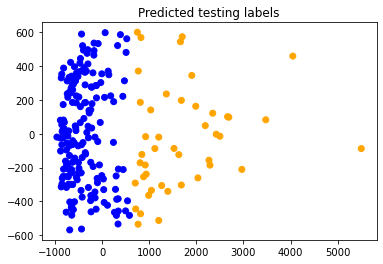

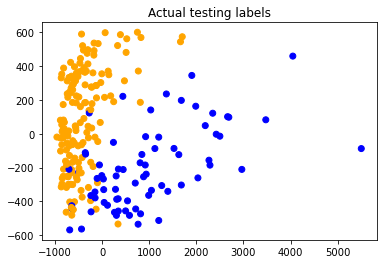

In [83]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels
colors1 = ['blue','orange']
KM = KMeans(n_clusters=2, random_state=0).fit(x_test3)
# predict cluster index for each sample 
Cluster_Index = KM.predict(x_test3)

# Model and fit the data to the PCA model
X_test_pca =  PCA(n_components=2).fit_transform(x_test3)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]

#plotting the graphs for predicted testing dataset
plt.title("Predicted testing labels")
plt.scatter(x,y,c=Cluster_Index,cmap=matplotlib.colors.ListedColormap(colors1))
plt.show()

#plotting graph for actual testing dataset
plt.title("Actual testing labels")
plt.scatter(x,y,c=y_test3,cmap=matplotlib.colors.ListedColormap(colors1))
plt.show()

###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

Confusion matrix for training data 
 [[ 66  74]
 [ 15 389]]
Confusion matrix for testing data 
 [[ 34  38]
 [155   6]]


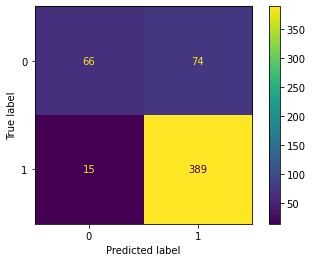

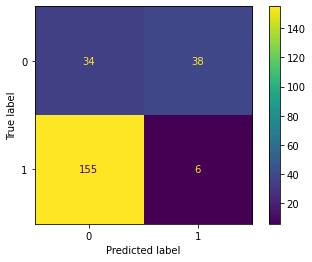

In [84]:
###################begin code for Task 1-b-4: Print out a confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
print("Confusion matrix for training data \n",confusion_matrix(y_train7,c_index))
#confusionmatrix for training data
cm = confusion_matrix(y_train7,c_index)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
#confusion matrix for testing data
print("Confusion matrix for testing data \n",confusion_matrix(y_test3,Cluster_Index))
cm = confusion_matrix(y_test3,Cluster_Index)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


###################end code for Task 1-b-4

# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [85]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


## Calculate pairwise distance matrix for X_train
pdm_train = x_train7

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
#compute cosine distances from data between samples
cosine_distance = pairwise_distances(pdm_train,metric='cosine')
# merges pair of clusters of data using linkage distance as complete.
cosine_complete = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(cosine_distance)
#computes f1score
cosine_complete_f1 = f1_score(y_train7,cosine_complete, labels=None, pos_label=1, average='weighted', sample_weight=None)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
#computes distance matrix between each data in the given dataset
euclidean_distance = pairwise_distances(pdm_train,metric='euclidean')
#agloomerative clustering. merges pair of clusters of data using linkage distance as complete.
euclidean_complete = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(euclidean_distance)
#computes f1score for euclidean linkage
euclidean_complete_f1 = f1_score(y_train7,euclidean_complete, labels=None, pos_label=1, average='weighted', sample_weight=None)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
#Computes L1(manhattan distance) distances between the vectors in X and Y.
manhattan_distance = pairwise_distances(pdm_train,metric='manhattan')
# merges pair of clusters of data using linkage distance as complete.
manhattan_complete = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(manhattan_distance)
#computes f1score for manhattan linkage. 
manhattan_complete_f1 = f1_score(y_train7,manhattan_complete, labels=None, pos_label=1, average='weighted', sample_weight=None)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
cosine_distance = pairwise_distances(pdm_train,metric='cosine')
#agloomerative clustering. merges pair of clusters of data using linkage distance as average.
cosine_average = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(cosine_distance)
cosine_average_f1 = f1_score(y_train7,cosine_average, labels=None, pos_label=1, average='weighted', sample_weight=None)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
euclidean_distance = pairwise_distances(pdm_train,metric='euclidean')
#agloomerative clustering. merges pair of clusters of data using linkage distance as average.
euclidean_average = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(euclidean_distance)
euclidean_average_f1 = f1_score(y_train7,euclidean_average, labels=None, pos_label=1, average='weighted', sample_weight=None)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
manhattan_distance = pairwise_distances(pdm_train,metric='manhattan')
#agloomerative clustering. merges pair of clusters of data using linkage distance as average.
manhattan_average = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(manhattan_distance)
manhattan_average_f1 = f1_score(y_train7,manhattan_average, labels=None, pos_label=1, average='weighted', sample_weight=None)

#printing all f1scores of data to the AgglomerativeClustering model 
print("F1-score for complete linkage + cosine",cosine_complete_f1 )
print("F1-score for complete linkage + euclidean", euclidean_complete_f1)
print("F1-score for complete linkage + manhattan", manhattan_complete_f1)
print("F1-score for average linkage + cosine",cosine_average_f1 )
print("F1-score for average linkage + euclidean", euclidean_average_f1)
print("F1-score for average linkage + manhattan", manhattan_average_f1)

###################end code for Task 2-a

F1-score for complete linkage + cosine 0.5639655970995512
F1-score for complete linkage + euclidean 0.10487118096506139
F1-score for complete linkage + manhattan 0.8258181571748933
F1-score for average linkage + cosine 0.09235854341736695
F1-score for average linkage + euclidean 0.10487118096506139
F1-score for average linkage + manhattan 0.10487118096506139


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

Best Model is:::: manhattan_complete


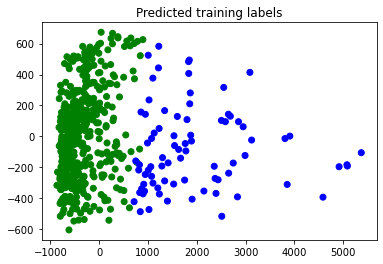

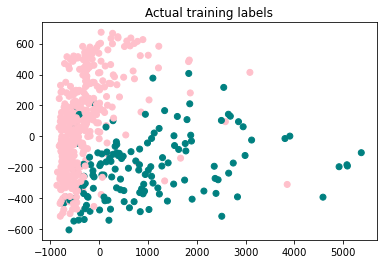

In [86]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels

models = {'cosine_complete':cosine_complete_f1,
          'euclidean_complete':euclidean_complete_f1,
          'manhattan_complete':manhattan_complete_f1,
          'cosine_average':cosine_average_f1,
          'euclidean_average':euclidean_average_f1,
          'manhattan_average':manhattan_average_f1}
#compare all values of agglomerative clustering models above returns the value that is high.
best_model_val = max(models,key=models.get)

if best_model_val == 'cosine_complete':
    best_model = cosine_complete

elif best_model_val == 'euclidean_complete':
    best_model = euclidean_complete

elif best_model_val == 'manhattan_complete':
    best_model = manhattan_complete

elif best_model_val == 'cosine_averge':
    best_model = cosine_average

elif best_model_val == 'euclidean_average':
    best_model = euclidean_average

elif best_model_val == 'manhattan_average':
    best_model = manhattan_average

else:
    best_model = None

print("Best Model is::::",best_model_val)    
X_train_pca = PCA(n_components=2).fit_transform(x_train7)


# Visualize the predicted training labels versus actual training labels. 
colors = ['blue','green']
colors1 = ['teal','pink']
x = X_train_pca[:,0]
y = X_train_pca[:,1]
#plotting predicted training label
plt.scatter(x,y,c=best_model,cmap=matplotlib.colors.ListedColormap(colors))
plt.title("Predicted training labels")
plt.show()
#plotting actual training model.
plt.scatter(x,y,c=y_train7, cmap=matplotlib.colors.ListedColormap(colors1))
plt.title("Actual training labels")
plt.show()


###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

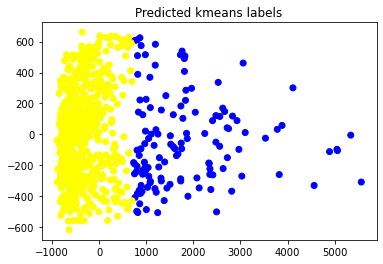

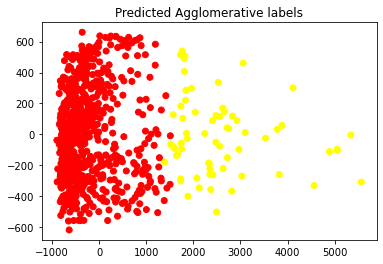

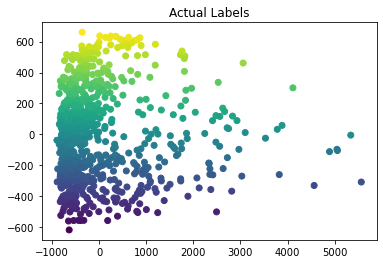

In [87]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
X = df[df.columns[:-1]]
y = df[df.columns[-1]]
colors = ['yellow','Red'] 
colors1 = ['blue','yellow'] 
km_data = KMeans(n_clusters=2,random_state=0).fit_predict(X)

### Agglomerative Clustering
# Calculate pairwise distance matrix for X
cosine_distance = pairwise_distances(X,metric='cosine')
euclidean_distance = pairwise_distances(X,metric='euclidean')
manhattan_distance = pairwise_distances(X,metric='manhattan')
# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
cosine_complete = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(cosine_distance)
cosine_complete_f1 = f1_score(y,cosine_complete, labels=None, pos_label=1, average='weighted', sample_weight=None)
euclidean_complete = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(euclidean_distance)
euclidean_complete_f1 = f1_score(y,euclidean_complete, labels=None, pos_label=1, average='weighted', sample_weight=None)
manhattan_complete = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(manhattan_distance)
manhattan_complete_f1 = f1_score(y,manhattan_complete, labels=None, pos_label=1, average='weighted', sample_weight=None)
cosine_average = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(cosine_distance)
cosine_average_f1 = f1_score(y,cosine_average, labels=None, pos_label=1, average='weighted', sample_weight=None)
euclidean_average = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(euclidean_distance)
euclidean_average_f1 = f1_score(y,euclidean_average, labels=None, pos_label=1, average='weighted', sample_weight=None)
manhattan_average = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(manhattan_distance)
manhattan_average_f1 = f1_score(y,manhattan_average, labels=None, pos_label=1, average='weighted', sample_weight=None)
models = {'cosine_complete':cosine_complete_f1,
          'euclidean_complete':euclidean_complete_f1,
          'manhattan_complete':manhattan_complete_f1,
          'cosine_average':cosine_average_f1,
          'euclidean_average':euclidean_average_f1,
          'manhattan_average':manhattan_average_f1}
best_model_val = max(models,key=models.get)

if best_model_val == 'cosine_complete':
    best_model = cosine_complete

elif best_model_val == 'euclidean_complete':
    best_model = euclidean_complete

elif best_model_val == 'manhattan_complete':
    best_model = manhattan_complete

elif best_model_val == 'cosine_averge':
    best_model = cosine_average

elif best_model_val == 'euclidean_average':
    best_model = euclidean_average

elif best_model_val == 'manhattan_average':
    best_model = manhattan_average

else:
    best_model = None
    

### Visualize Clusters
#  Model and fit the data to the PCA model
X_pca = PCA(n_components=2).fit_transform(X)
x = X_pca[:,0]
y = X_pca[:,1]

# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 
plt.scatter(x,y,c=km_data, cmap=matplotlib.colors.ListedColormap(colors1))
plt.title("Predicted kmeans labels")
plt.show()
plt.scatter(x,y,c=best_model, cmap=matplotlib.colors.ListedColormap(colors))
plt.title("Predicted Agglomerative labels")
plt.show()
plt.title("Actual Labels")
plt.scatter(x,y,c=y)
plt.show()

###################end code for Task 3-a

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

In [88]:
###################begin code for Task 3-b
X = df[df.columns[:-1]]
y = df[df.columns[-1]]
print("Confusion matrix\n")
print("------------------------------------------")
km_data = KMeans(n_clusters=2,random_state=0).fit_predict(X)

kmeans_confusion_matrix1 = confusion_matrix(y,km_data)
agglo_confusion_matrix2 = confusion_matrix(y,best_model)
print("Kmeans:")
print(kmeans_confusion_matrix1)
print("Agglomerative:")
print(agglo_confusion_matrix2)
print("\nPrecision\n")
print("------------------------------------------")
kmeans_precision1 = precision_score(y,km_data, labels=None, pos_label=1, average='weighted', sample_weight=None)
agglo_precision2 = precision_score(y,best_model, labels=None, pos_label=1, average='weighted', sample_weight=None)
print("Kmeans:")
print(kmeans_precision1)
print("Agglomerative:")
print(agglo_precision2)
print("\nRecall\n")
print("------------------------------------------")
kmeans_recall1 = recall_score(y,km_data, labels=None, pos_label=1, average='weighted', sample_weight=None)
agglo_recall2 = recall_score(y,best_model, labels=None, pos_label=1, average='weighted', sample_weight=None)
print("Kmeans:")
print(kmeans_recall1)
print("Agglomerative:")
print(agglo_recall2)
print("\nF1 Score\n")
print("------------------------------------------")
kmeans_f1_score1 = f1_score(y,km_data, labels=None, pos_label=1, average='weighted', sample_weight=None)
agglo_f1_score2 = f1_score(y,best_model, labels=None, pos_label=1, average='weighted', sample_weight=None)
print("Kmeans:")
print(kmeans_f1_score1)
print("Agglomerative:")
print(agglo_f1_score2)
print("\nAccuracy Score\n")
print("------------------------------------------")
print("Accuracy of kmeans:",accuracy_score(y,km_data))
print("Accuracy of agglomerative :",accuracy_score(y,best_model))
print("--------------------------------------------------------------------")
print("\nThe Precision and F1-Score values are more with Agglomerative than Kmeans.But the recall and accuracy score for the hirerachical Agglomerative clustering and K means Clustering is similar")


###################end code for Task 3-b

Confusion matrix

------------------------------------------
Kmeans:
[[1 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 5 0 ... 0 0 0]
 [1 9 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
Agglomerative:
[[ 1  0  0 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 ...
 [ 0  5  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]]

Precision

------------------------------------------
Kmeans:
1.7986908876739383e-05
Agglomerative:
2.7030364109015796e-05

Recall

------------------------------------------
Kmeans:
0.003861003861003861
Agglomerative:
0.003861003861003861

F1 Score

------------------------------------------
Kmeans:
3.5769192344050344e-05
Agglomerative:
5.3420221487448384e-05

Accuracy Score

------------------------------------------
Accuracy of kmeans: 0.003861003861003861
Accuracy of agglomerative : 0.003861003861003861
--------------------------------------------------------------------

The Precision and F1-Score values are more with Agglomer

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[35 points] Task 1:</b>  

    [10 points] Task 1-a: Determine “k” value from the elbow method

    [25 points] Task 1-b: Visualization for K-Means Clustering

        [02 points] Task 1-b-1: Split the dataset 
    
        [10 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [10 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [03 points] Task 1-b-4: Print out a confusion matrix
    


<b>[45 points] Task 2:</b>  

    [35 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [10 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering



<b>[15 points] Report :</b> 
Make a 4 min video explaining both the assignment and it's implementation.


 <b>[20 points] Task 3 (BONUS):</b> 

    Task 3-a: 10 points

    Task 3-b: 10 points

In [ ]:
<b> References:
      1 . https://www.youtube.com/watch?v=zQfEc7vA1gU
      2 . https://scikit-learn.org/stable/modules/generated/sklearn.metrics.html
      3 . https://www.kdnuggets.com/2020/12/data-compression-dimensionality-reduction.html
        
        